# 머신러닝 프레임워크 : scikit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하면 샘플데이터로 제공합니다. 

In [8]:
# XOR 연산 학습해 보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [9]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2] # 문제 , Feature Columns
xor_label = xor_df.iloc[:,2] # 정답 , Target Column
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [10]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics # metrics 정확도 구할떄 사용

clf = svm.SVC() # instance / svm - SVC Classification & SVR Regression
clf.fit(xor_data, xor_label) # fit :  공부, 학습시킨다 
# 문제와 정답을 줌 ; 지도학습
pred = clf.predict(xor_data) # predict 공부한거 가지고 예측할때 사용한다.
print(pred)

[0 1 1 0]


In [11]:
# 정답률 구하기
ac_score = metrics.accuracy_score(xor_label , pred) # (정답, 예측값)
print('정답률 :', ac_score)

정답률 : 1.0


In [12]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
clf.score(xor_data , xor_label) # predict 와 metrix(정확도)를 한번에
# 전체 데이터셋을 traing / valid 데이터로 나눠 과대 과소 적합을 판단할때 사용한다
# (train 문제 , train정답) / ( test 문제, test 정답)

1.0

> predict (학습시킨거로 예측) / score (과대,과소적합 판단) 사용 용도가 다르다 !

---
### iris 데이터

In [13]:
# 붓꽃의 품종 분류하기
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# 기본 통계량 확인하기
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# NaN 확인하기
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [16]:
# 품종을 컬러값으로 구분하기 위한 작업 # 1 강사님 풀이
color_tmp = []

for name in iris['Name']:
    if name == 'Iris-setosa' :
        color_tmp.append('red')
    elif name == 'Iris-versicolor' :
        color_tmp.append('green')
    else:
        color_tmp.append('blue')

iris['Color'] = color_tmp
iris.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
5,5.4,3.9,1.7,0.4,Iris-setosa,red
6,4.6,3.4,1.4,0.3,Iris-setosa,red
7,5.0,3.4,1.5,0.2,Iris-setosa,red
8,4.4,2.9,1.4,0.2,Iris-setosa,red
9,4.9,3.1,1.5,0.1,Iris-setosa,red


In [17]:
# 품종을 컬러값으로 구분하기 위한 작업 # 2
# Color 컬럼 추가하기 : setosa - red / versicolor - blue / virginica - green /
# iris.Name.unique()
iris.loc[iris.Name == 'Iris-setosa', 'Color'] = 'red'
iris.loc[iris.Name == 'Iris-versicolor', 'Color'] = 'blue'
iris.loc[iris.Name == 'Iris-virginica', 'Color'] = 'green'
iris.head(20)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
5,5.4,3.9,1.7,0.4,Iris-setosa,red
6,4.6,3.4,1.4,0.3,Iris-setosa,red
7,5.0,3.4,1.5,0.2,Iris-setosa,red
8,4.4,2.9,1.4,0.2,Iris-setosa,red
9,4.9,3.1,1.5,0.1,Iris-setosa,red


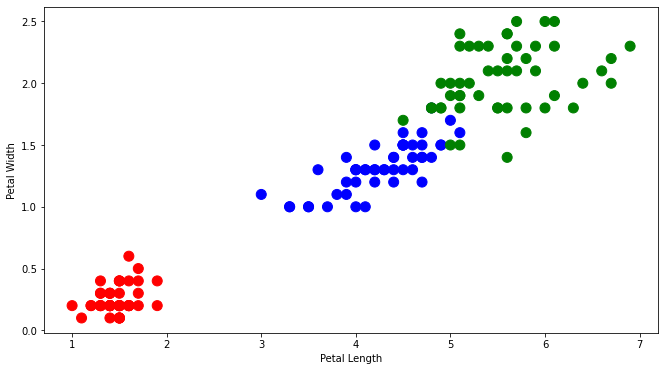

In [18]:
# Scatter 그려보기 
# ** 분석가가 제일 처음 확인 해야 하는게 Scatter 이다 **
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'], 
    c=iris['Color'] ,
    s=100
    )
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

> 정확도만 높다고 좋은것이 아니다. 과대과소적합을 항상 고려해야 한다.

In [19]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']

print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [20]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split # 얘가 알아서 나눠줌

# 순서 중요 (학습 문제 , 테스트 문제, 학습 정답, 테스트 정답)
train_data , test_data, train_label , test_label = train_test_split(iris_data, iris_label) 

print(train_data.head())
print(test_data.head())
print("----------------------------------------------------------------")
print(train_label.head())
print(test_label.head())

     SepalLength  SepalWidth  PetalLength  PetalWidth
53           5.5         2.3          4.0         1.3
33           5.5         4.2          1.4         0.2
143          6.8         3.2          5.9         2.3
124          6.7         3.3          5.7         2.1
37           4.9         3.1          1.5         0.1
     SepalLength  SepalWidth  PetalLength  PetalWidth
122          7.7         2.8          6.7         2.0
71           6.1         2.8          4.0         1.3
10           5.4         3.7          1.5         0.2
100          6.3         3.3          6.0         2.5
67           5.8         2.7          4.1         1.0
----------------------------------------------------------------
53     Iris-versicolor
33         Iris-setosa
143     Iris-virginica
124     Iris-virginica
37         Iris-setosa
Name: Name, dtype: object
122     Iris-virginica
71     Iris-versicolor
10         Iris-setosa
100     Iris-virginica
67     Iris-versicolor
Name: Name, dtype: object


In [21]:
# 학습 시키기 
clf = svm.SVC()
clf.fit(train_data , train_label)

SVC()

In [22]:
# 예측하기
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [23]:
# 정답률
ac_score = metrics.accuracy_score(test_label, pred)
print("정답률 : ", ac_score)

정답률 :  0.9210526315789473


In [24]:
# Train / Test 정답률
print('train 정답률 : ', clf.score(train_data , train_label))
print('test 정답률 : ', clf.score(test_data , test_label))
# 과대 과소 적합 판단, 소수점 둘째자리 까지만 본다

train 정답률 :  0.9821428571428571
test 정답률 :  0.9210526315789473


In [25]:
# 분류 Report() : Confusion matrix
cl_report = metrics.classification_report(test_label , pred)
print(cl_report)
# 보통 F1 Score를 보면 된다
# 정밀도precision , 재현율recall , F1 Score , support (랜덤갯수표준)
# 정확도 accuracy
# 매크로 = 평균값이 가장 높은 숫자의 비중 
# weighted avg = 가중치 값이 얼마나 정확 했는지 , 식이 얼마나 정확했는지 보는 지표. y = ax + b + a2x + b2 에서  a(1,2,,,)의값
# 서포트 랜덤갯수표준(그때그때 달라지긴 함) = 샘플로 나눴을 때, 50개의 샘플중 샘플링 기본값 20%가 적용, 40개 샘플 중에서 선에 가까운것만 학습한다, 
# 세토사를 도출하기 위해 15개를 학습, 버지칼라를 도출하기 위해 11개를 학습혰다 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.92        38
      macro avg       0.94      0.93      0.93        38
   weighted avg       0.93      0.92      0.92        38



In [26]:
test1 = [4.1, 3.5, 1.4, 0.2]

clf.predict([test1]) # test_data 가 2차원이라서 ! 2차원 맞춰줘야함

array(['Iris-setosa'], dtype=object)

---
### 분류 Report 이해하기

번호 : [1,  2,  3,  4,  5,  6]    
정답 : [음치, 음치, 음치, 음치, 정상, 정상]     
예측 : [음치, 음치, 정상, 정상, 정상, 정상]

정확도 : 예측이 맞은 비율?      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1,2,5,6번은 맞추고 3,4번은 틀렸다. 6명 중에서 4명을 맞췄으므로 정확도는 4/6 = 2/3 = 0.66이다.  ==> 이런 글로 쓴 규칙이 곧 알고리즘이다.         
정밀도 : 음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가?         
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;내가 음치라고 예측한 1,2번이 둘다 음치가 맞았다. 2/2 = 1.0              
재현율 : 전체 음치 중에 내가 맞춘 음치의 비율은?                        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;원래 음치가 4명 있는데 나는 그 중에서 2명을 맞췄다. 2/4 = 0.5           
F1 Score : 정밀도와 재현율의 평균       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 2 * 1.0 * 0.5 / (1.0 + 0.5) = 0.66                

# Python Code로 확인하기

In [27]:
import numpy as np

In [28]:
# 타겟이 되는 값은 무조건 양수여야 한다. 0은 될 수 없다
y = np.array([1,1,1,1,0,0]) # 정답 - 1 : 음치 , 0 : 정상
p = np.array([1,1,0,0,0,0]) # 예측 

# 정확도 
accuracy = np.mean(np.equal(y , p))
print( 'accuracy :', accuracy)

# 정밀도 
right = np.sum( y * p == 1) # y , p 가 둘 다 1이여야 음치를 맞춘것 
precision = right / np.sum(p) # 음치 예측 정밀도
print( 'precision :', precision)

# 재현율
recall = right / np.sum(y)
print('recall :', recall)

# F1 Score
f1 = 2 * precision * recall / (precision + recall)
print('f1 score :', f1)

accuracy : 0.6666666666666666
precision : 1.0
recall : 0.5
f1 score : 0.6666666666666666


In [31]:
# sklearn을 이용

print('accuracy: ', metrics.accuracy_score(y , p))
print('precision: ', metrics.precision_score(y , p))
print('recall: ', metrics.recall_score(y , p))
print('f1 score: ', metrics.f1_score(y , p))

accuracy:  0.6666666666666666
precision:  1.0
recall:  0.5
f1 score:  0.6666666666666666


> 레이블이 숫자가 아닌 경우에는 report를 보는것이 편하다(iris). 레이블이 숫자인 경우 위와 같이 알고리즘 함수를 만들어 계산할 수 있다.

---